In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)

In [2]:
df_por = pd.read_pickle('df_por-modelling-range_G3_5-repaired_G3_0_values.pkl')

df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,1,1,18,1,1,0,4,4,2,2,1,0,0,0,1,1,0,0,4,3,4,1,1,3,2,3,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1,1,1,17,1,1,1,1,1,1,2,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,3,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,1,1,15,1,0,1,1,1,1,2,1,0,0,0,1,1,1,0,4,3,2,2,3,3,1,3,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,1,1,15,1,1,1,4,2,1,3,0,1,0,1,1,1,1,1,3,2,2,1,1,5,2,4,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,1,1,16,1,1,1,3,3,1,2,0,1,0,0,1,1,0,0,4,3,2,1,2,5,2,4,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0


In [3]:
X = np.array(df_por.drop('G3',axis = 1))
y = np.array(df_por['G3'])

## Feature Importance

### Linear Regression 

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,stratify = y,random_state = 42)

In [5]:
sc = MinMaxScaler()
sc.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [6]:
X_train = sc.transform(X_train)

In [7]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

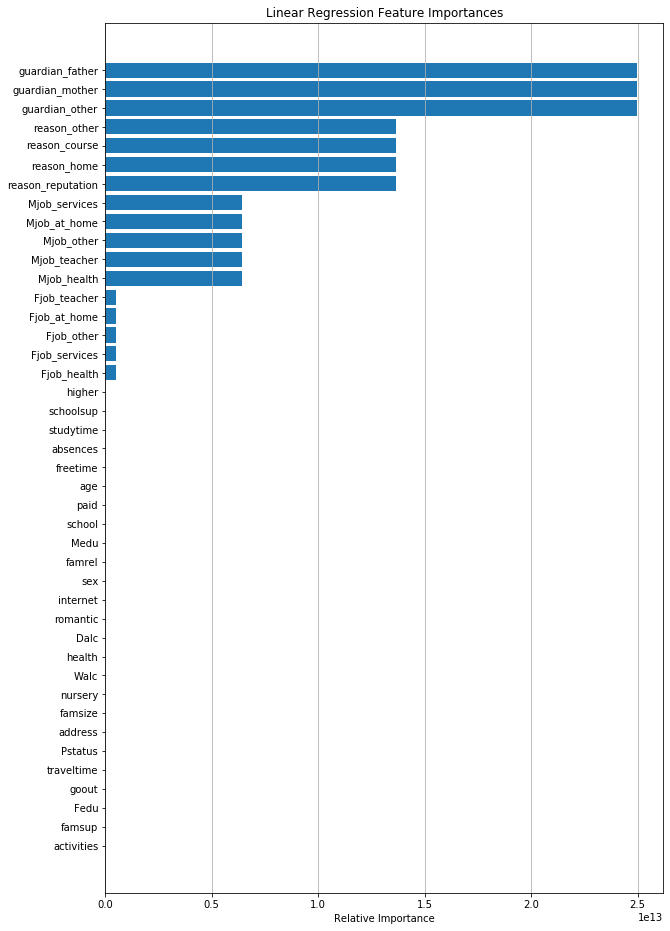

In [8]:
feature_importances = np.abs(model.coef_)
feature_importances_ordered_indices = np.argsort(feature_importances)

fig,ax = plt.subplots(figsize = (10,16))
ax.barh(range(len(feature_importances)),feature_importances[feature_importances_ordered_indices])
plt.yticks(range(len(feature_importances)),
           [list(df_por.drop('G3',axis = 1).columns)[i] for i in feature_importances_ordered_indices])
plt.gca().xaxis.grid(True)
plt.title('Linear Regression Feature Importances')
plt.xlabel('Relative Importance');

In [9]:
feature_importance_lir = pd.DataFrame(np.argsort(np.argsort(model.coef_)))
feature_importance_lir.columns = ['fi_lir']
feature_importance_lir.set_index(df_por.drop('G3',axis = 1).columns,inplace = True)

feature_importance_lir

,fi_lir
school,29
sex,26
age,30
address,24
famsize,17
Pstatus,23
Medu,28
Fedu,19
traveltime,22
studytime,32


### Logistic Regression

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,stratify = y,random_state = 42)

In [11]:
sm = SMOTE(k_neighbors = 3,random_state = 42)

In [12]:
X_train,y_train = sm.fit_resample(X_train,y_train)

In [13]:
X_train.shape

(1235, 42)

In [14]:
sc = MinMaxScaler()
sc.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [15]:
X_train = sc.transform(X_train)

In [16]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

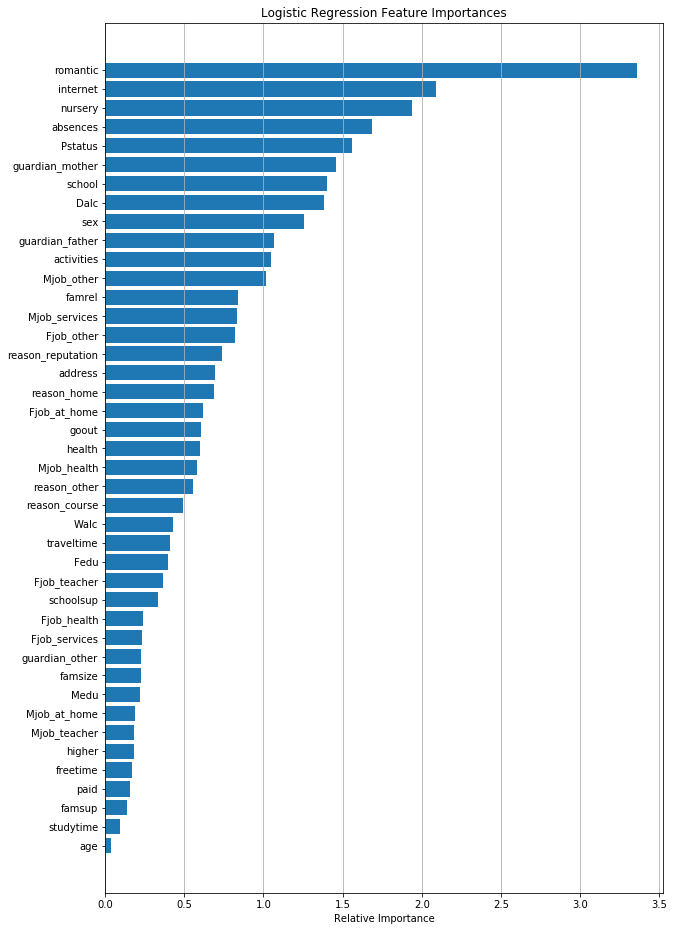

In [17]:
feature_importances = np.abs(model.coef_[0])
feature_importances_ordered_indices = np.argsort(feature_importances)

fig,ax = plt.subplots(figsize = (10,16))
ax.barh(range(len(feature_importances)),feature_importances[feature_importances_ordered_indices])
plt.yticks(range(len(feature_importances)),
           [list(df_por.drop('G3',axis = 1).columns)[i] for i in feature_importances_ordered_indices])
plt.gca().xaxis.grid(True)
plt.title('Logistic Regression Feature Importances')
plt.xlabel('Relative Importance');

In [18]:
feature_importance_lor = pd.DataFrame(np.argsort(np.argsort(model.coef_[0])))
feature_importance_lor.columns = ['fi_lor']
feature_importance_lor.set_index(df_por.drop('G3',axis = 1).columns,inplace = True)

feature_importance_lor

,fi_lor
school,3
sex,4
age,30
address,11
famsize,34
Pstatus,1
Medu,25
Fedu,19
traveltime,18
studytime,31


### Random Forest Classifier

In [19]:
model = RandomForestClassifier(n_estimators = 500,max_depth = 30,min_samples_split = 2,min_samples_leaf = 1)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

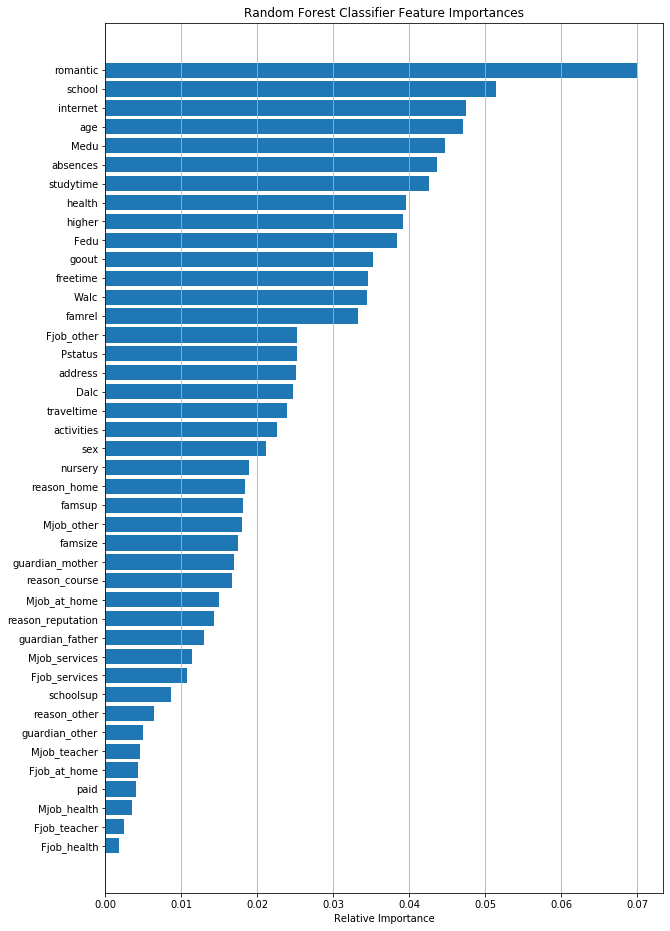

In [20]:
feature_importances = model.feature_importances_
feature_importances_ordered_indices = np.argsort(feature_importances)

fig,ax = plt.subplots(figsize = (10,16))
ax.barh(range(len(feature_importances)),feature_importances[feature_importances_ordered_indices])
plt.yticks(range(len(feature_importances)),
           [list(df_por.drop('G3',axis = 1).columns)[i] for i in feature_importances_ordered_indices])
plt.gca().xaxis.grid(True)
plt.title('Random Forest Classifier Feature Importances')
plt.xlabel('Relative Importance');

In [21]:
feature_importance_rf = pd.DataFrame(np.argsort(np.argsort(model.feature_importances_)))
feature_importance_rf.columns = ['fi_rf']
feature_importance_rf.set_index(df_por.drop('G3',axis = 1).columns,inplace = True)

feature_importance_rf

,fi_rf
school,40
sex,21
age,38
address,25
famsize,16
Pstatus,26
Medu,37
Fedu,32
traveltime,23
studytime,35


### XGBoost Classifier

In [22]:
model = XGBClassifier(learning_rate = 0.1,gamma = 0.001,max_depth = 10)
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.001,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

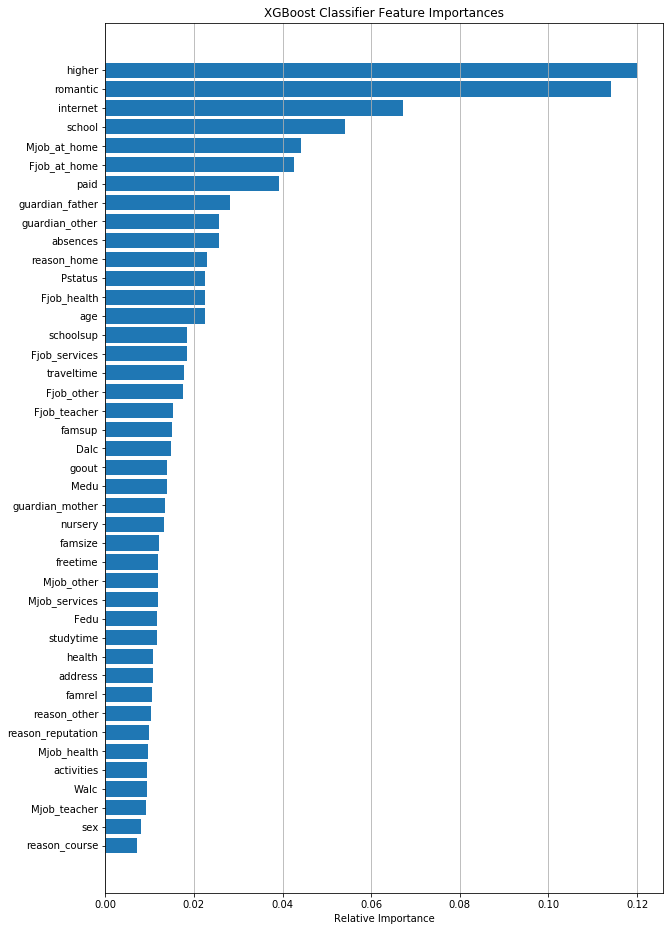

In [23]:
feature_importances = model.feature_importances_
feature_importances_ordered_indices = np.argsort(feature_importances)

fig,ax = plt.subplots(figsize = (10,16))
ax.barh(range(len(feature_importances)),feature_importances[feature_importances_ordered_indices])
plt.yticks(range(len(feature_importances)),
           [list(df_por.drop('G3',axis = 1).columns)[i] for i in feature_importances_ordered_indices])
plt.gca().xaxis.grid(True)
plt.title('XGBoost Classifier Feature Importances')
plt.xlabel('Relative Importance');

In [24]:
feature_importance_xgb = pd.DataFrame(np.argsort(np.argsort(model.feature_importances_)))
feature_importance_xgb.columns = ['fi_xgb']
feature_importance_xgb.set_index(df_por.drop('G3',axis = 1).columns,inplace = True)

feature_importance_xgb

,fi_xgb
school,38
sex,1
age,28
address,9
famsize,16
Pstatus,30
Medu,19
Fedu,12
traveltime,25
studytime,11


## Feature Importances Table

In [25]:
df_feature_importances_table = pd.concat([feature_importance_lir,feature_importance_lor,
                                          feature_importance_rf,feature_importance_xgb],axis = 1)

df_feature_importances_table.head()

,fi_lir,fi_lor,fi_rf,fi_xgb
school,29,3,40,38
sex,26,4,21,1
age,30,30,38,28
address,24,11,25,9
famsize,17,34,16,16


In [26]:
df_feature_importances_table['score'] = df_feature_importances_table['fi_lir'] + df_feature_importances_table['fi_lor'] + \
                                        df_feature_importances_table['fi_rf'] + df_feature_importances_table['fi_xgb']

df_feature_importances_table.head()

,fi_lir,fi_lor,fi_rf,fi_xgb,score
school,29,3,40,38,110
sex,26,4,21,1,52
age,30,30,38,28,126
address,24,11,25,9,69
famsize,17,34,16,16,83


In [27]:
df_feature_importances_table['score'].sort_values(ascending = False)

absences             138
higher               134
romantic             134
age                  126
school               110
Medu                 109
studytime            109
internet             103
guardian_other       102
Fjob_other            96
Dalc                  96
health                94
Fjob_services         93
nursery               93
guardian_father       91
Fjob_at_home          90
famsup                89
traveltime            88
freetime              87
Fjob_health           85
activities            84
famsize               83
goout                 83
Walc                  82
Fjob_teacher          82
Fedu                  82
Mjob_at_home          81
Pstatus               80
paid                  77
guardian_mother       75
famrel                70
address               69
schoolsup             65
reason_home           64
sex                   52
Mjob_teacher          47
Mjob_other            43
Mjob_services         35
reason_course         32
reason_reputation     31


In [28]:
df_feature_importances_table = df_feature_importances_table.sort_values('score',ascending = False)

df_feature_importances_table.head()

,fi_lir,fi_lor,fi_rf,fi_xgb,score
absences,31,39,36,32,138
romantic,12,41,41,40,134
higher,33,27,33,41,134
age,30,30,38,28,126
school,29,3,40,38,110


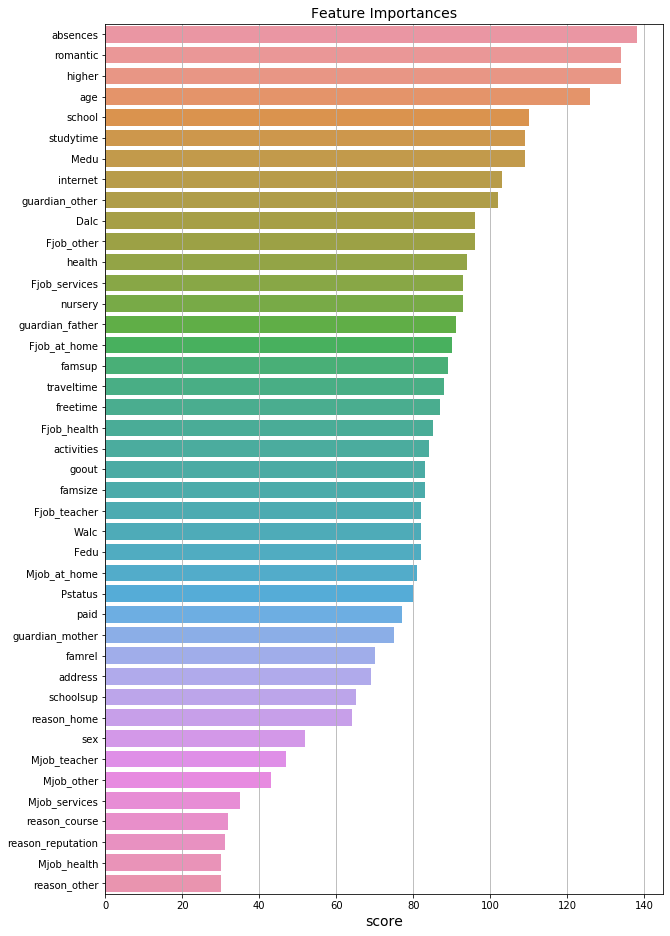

In [29]:
plt.figure(figsize = (10,16))
sns.barplot(data = df_feature_importances_table,x = 'score',y = df_feature_importances_table.index)
plt.gca().xaxis.grid(True)
plt.title('Feature Importances',fontsize = 14)
plt.xlabel('score',fontsize = 14);